# Business problem
## Classification Project
## Loan approval analysis

### About this file
* Data set taken from : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

### Problem Statement
#### About Company
* Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
* Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### ***Data Understanding***
* There are sales data available for 45 stores of Walmart in Kaggle. This is the data that covers sales from 2010-02-05 to 2012-10-26.

### ***The data contains these features***
  * This file contains anonymized information about the 45 stores, additional data related to the store and regional activity for the given dates. It contains the following fields:

>__Loan_Approval_Analysis.csv__
  * Loan_Id : Unique Loan ID
  * Gender : Male/Female
  * Married : Applicant married (Y/N)
  * Dependents : Number of dependents
  * Education : Applicant Education (Graduate/Under Graduate)
  * Self_Employed : Self employed (Y/N)
  * ApplicantIncome : Applicant income
  * CoapplicantIncome : Coapplicant income
  * LoanAmount : Loan amount in thousands
  * Loan_Amount_Term : Term of loan in months
  * Credit_History : Credit history meets guidelines
  * Property_Area : Urban/Semi Urban/Rural
  * Loan_Status : Loan approved (Y/N)
      

# **Data Acquisition**


### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

### Collecting Data

In [2]:
missing_sign = ['n/a', 'na', 'nan', '--', 'none', 'NaN']
df_loan = pd.read_csv('loan_train.csv', na_values = missing_sign)

In [3]:
df_loan.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
39,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
156,LP001541,Male,Yes,1,Graduate,No,6000,0.0,160.0,360.0,NaN,Rural,Y
257,LP001854,Male,Yes,3+,Graduate,No,5250,0.0,94.0,360.0,1.0,Urban,N
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_loan.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


#### Convert data type

In [6]:
df_loan.drop('Loan_ID', axis = 1, inplace = True)

In [7]:
def set_Dtype(df):
  cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']
  for i in cat_cols:
    df[i] = df[i].astype('category')
  df['ApplicantIncome'] = df['ApplicantIncome'].astype('int32')
  df['CoapplicantIncome'] = df['CoapplicantIncome'].astype('float32')
  df['LoanAmount'] = df['LoanAmount'].astype('float32')
  df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('float32')
  return df

In [8]:
df = set_Dtype(df_loan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    category
 1   Married            611 non-null    category
 2   Dependents         599 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      582 non-null    category
 5   ApplicantIncome    614 non-null    int32   
 6   CoapplicantIncome  614 non-null    float32 
 7   LoanAmount         592 non-null    float32 
 8   Loan_Amount_Term   600 non-null    float32 
 9   Credit_History     564 non-null    category
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    category
dtypes: category(8), float32(3), int32(1)
memory usage: 15.6 KB


# **Data Preparation**


In [10]:
class preparingData:
  def __init__(self, data):
    self.data = data
    self.columns = self.data.columns
    self.cat_cols = self.data.select_dtypes(include = 'category').columns

## Data Cleaning

In [11]:
df_clean = df.copy()

### Missing value

In [12]:
df_clean.isna().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
class missingValue(preparingData):
  def imputeMissValue(self):
    for column in self.columns:
      if column in self.cat_cols:
        self.__imputeModeValue(column)
      else:
        self.__imputeMedianValue(column)

  def __imputeModeValue(self, column):
    mode_value = self.data[column].mode()[0]
    self.data[column].fillna(mode_value, inplace = True)

  def __imputeMedianValue(self, column):
    median_value = self.data[column].median()
    self.data[column].fillna(median_value, inplace = True)

In [14]:
clean = missingValue(df_clean)
clean.imputeMissValue()

In [15]:
df_clean.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory data analysis

In [16]:
df_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Univariate Analysis

#### Numerical Data

In [17]:
num_cols = df_clean.select_dtypes(exclude = 'category').columns

In [18]:
def plotHistograms(data, columns):
  nrows = 2
  ncols = len(columns)
  fig, (ax_box, ax_hist) = plt.subplots(nrows, ncols, gridspec_kw = {"height_ratios": (.15, .85)}, figsize = (25,5))
  for idx, column in enumerate(columns):
    sns.boxplot(data = data, x = column, ax = ax_box[idx])
    sns.histplot(data = data, x = column, kde = True, ax = ax_hist[idx])
    ax_box[idx].set(xlabel = '')

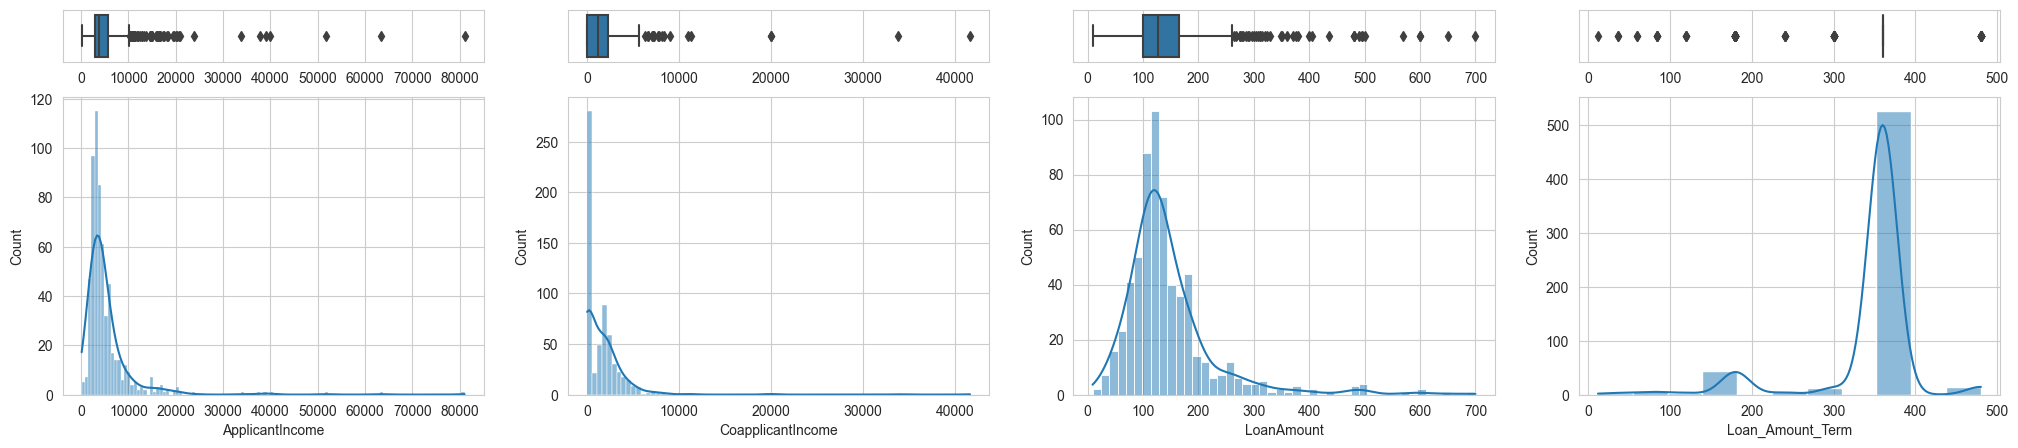

In [19]:
plotHistograms(df_clean, num_cols)

#### Categorical Data

In [20]:
cat_cols = df_clean.select_dtypes('category').columns

In [21]:
# Check quantities each columns
def plotQtyValues(data, column):
  qty_column = len(column)
  fig, ax_bar = plt.subplots(ncols = qty_column, figsize = (25,5))
  for idx, column in enumerate(column):
    df_count = data[column].value_counts(normalize = True).to_frame(name = 'Count')
    sns.barplot(x = df_count.index, y = df_count['Count'], order = df_count.index, ax = ax_bar[idx])
    for x, y in enumerate(df_count.iterrows()):
      ax_bar[idx].text(x, y[1]['Count']+0.005, '{:.2f}'.format(y[1]['Count']), ha = 'center', color = 'gray')
      ax_bar[0].set(ylabel = 'Percentage of value')
      ax_bar[idx].set(ylabel = None)
      ax_bar[idx].set(title = column)

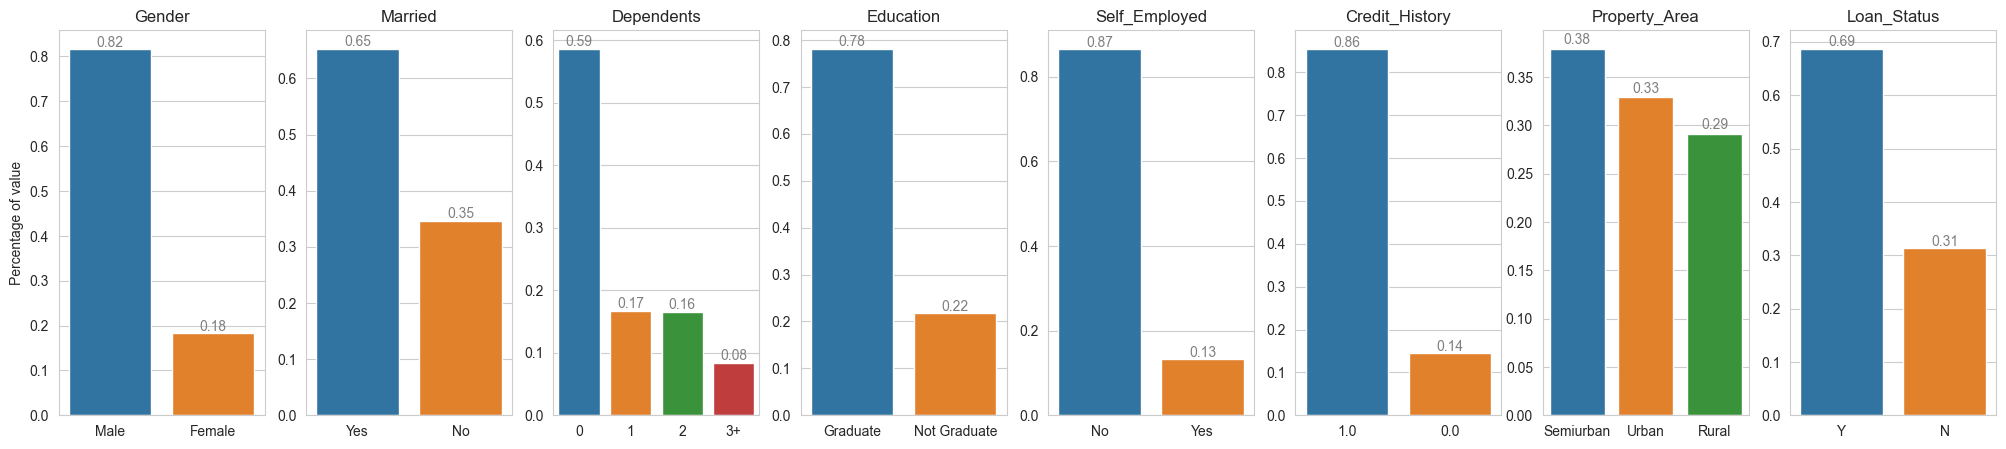

In [22]:
plotQtyValues(df_clean, cat_cols)

### Bivariate Analysis

In [23]:
def plotQtyTarget(data, feature, target):
  qty_column = len(feature)
  fig, ax = plt.subplots(ncols = qty_column, figsize = (25,5))
  for idx, column in enumerate(feature):
    df_cross = pd.crosstab(data[column], data[target])
    df_cross.div(df_cross.sum(1), axis = 0).plot(kind = 'bar', stacked = True, ax = ax[idx])
    ax[idx].tick_params(axis = 'x', rotation = 0)
    ax[0].set(ylabel = 'Percentage of value')

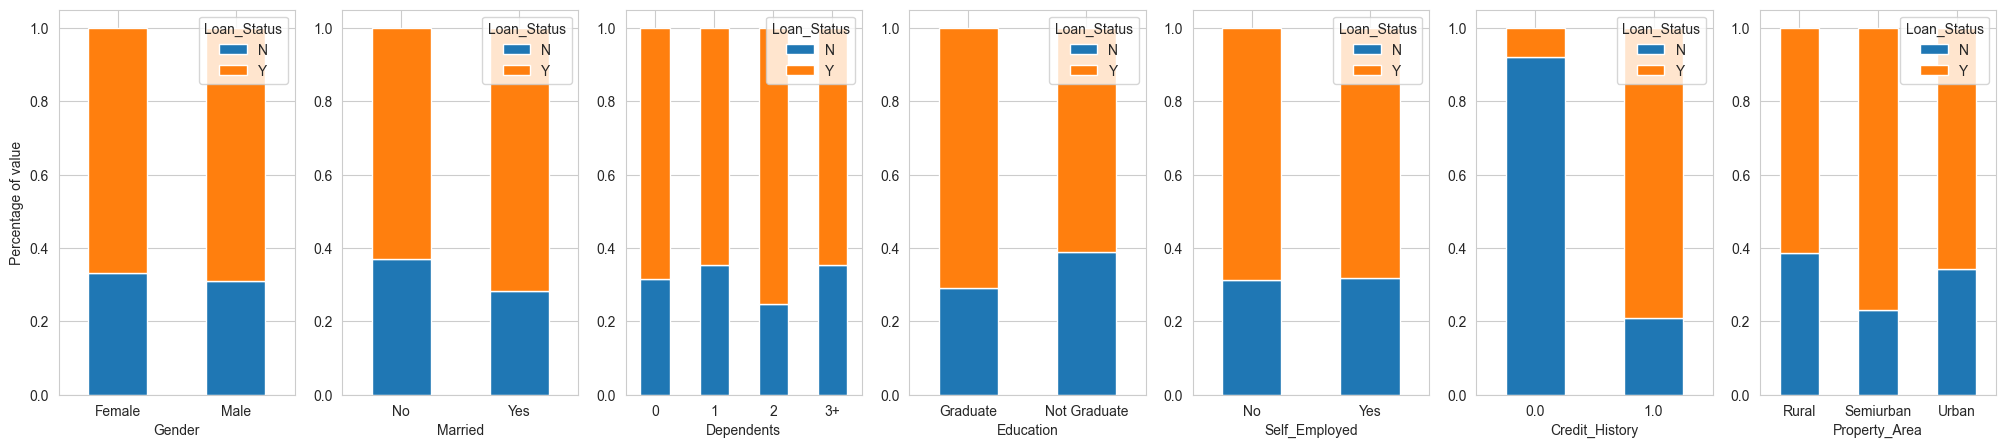

In [24]:
feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
target = 'Loan_Status'
plotQtyTarget(df_clean, feature, target)

## Data transformation

In [25]:
df_trans = df_clean.copy()

In [26]:
df_trans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
class transformationData(preparingData):
  def transformData(self):
    for column in self.columns:
      if column in self.cat_cols:
        self.__encodeLabel(column)
      else:
        self.__scaleFeature(column)

  def __encodeLabel(self, column):
    encode = LabelEncoder()
    self.data[column] = encode.fit_transform(self.data[column])

  def __scaleFeature(self, column):
    sc = StandardScaler()
    self.data[column] = sc.fit_transform(np.array(self.data[column]).reshape(-1, 1))

In [28]:
trans = transformationData(df_trans)
trans.transformData()

In [29]:
df_trans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1,2,1


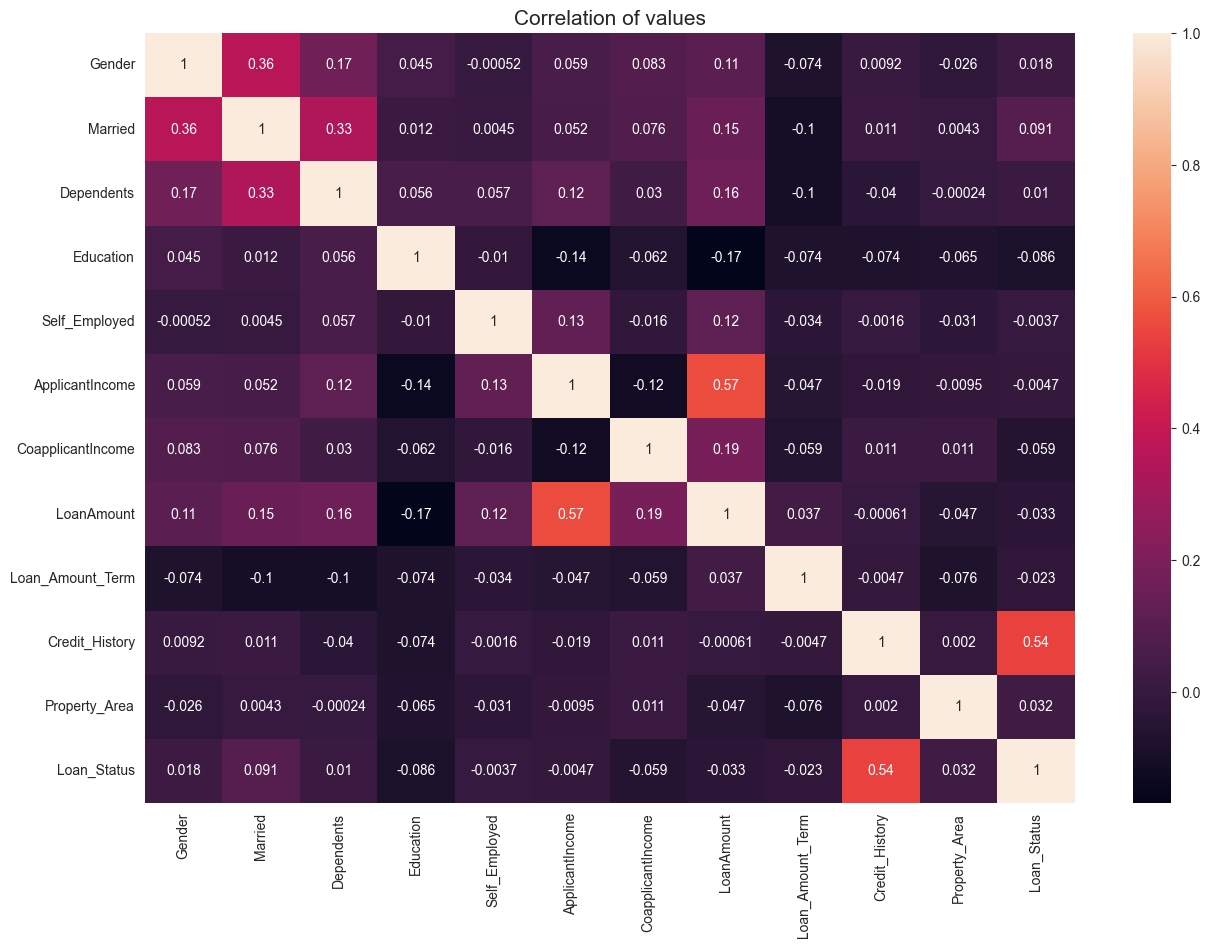

In [30]:
# Check correlation of values
corr = df_trans.corr()
plt.figure(figsize = (15, 10))
ax = sns.heatmap(corr, annot = True)
ax.set_title('Correlation of values', fontsize = 15);

# **Modeling**

In [31]:
class splitingData():
  def __init__(self, data, target_name):
    self.data = data
    self.target_name = target_name
    self.x = self.data.drop(self.target_name, axis = 1)
    self.y = self.data[target_name]
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size = 0.2, random_state = 25)

## Compare model

In [32]:
class comparingModel(splitingData):
  def compareModel(self, algorithms):
    r_score = []
    model_name = []
    for name in algorithms:
      cvs = cross_val_score(algorithms[name], self.x_train, self.y_train, cv = 10)
      model_name.append(name)
      r_score.append(cvs.mean()*100)
      score = pd.DataFrame(r_score, columns = ['Score(%)'], index = model_name)
    return score

In [33]:
algorithms = {
    'LogisticRegression' : LogisticRegression(),
    'NaiveBayes' : GaussianNB(),
    'SupportVectorMachine' : SVC(),
    'DecisionTree' : DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier()
}

In [34]:
target_name = 'Loan_Status'

In [35]:
compare = comparingModel(df_trans, target_name)
score_test = compare.compareModel(algorithms)

In [36]:
score_test

,Score(%)
LogisticRegression,80.861224
NaiveBayes,80.248980
SupportVectorMachine,80.661224
DecisionTree,73.734694
RandomForest,78.824490


In [37]:
# Choose model has the most efficiency
idx_max = score_test['Score(%)'].idxmax()
model = algorithms[idx_max]
model

LogisticRegression()

## Train model

In [38]:
class trainingModel(splitingData):
  def trainModel(self, model):
    self.model = model
    self.model.fit(self.x_train, self.y_train)
    
  def reportModel(self):
    self.__roc_curve()
    y_pred = self.model.predict(self.x_test)
    report = classification_report(self.y_test, y_pred)
    accuracy = accuracy_score(self.y_test, y_pred)
    confusion = confusion_matrix(self.y_test, y_pred)
    print(f'Use algorithm : {self.model}')
    print('-'*55)
    print(f'Classification Report :\n{report}')
    print('-'*55)
    print(f'Accuracy : {accuracy*100:.4f}%')
    print('-'*55)
    print(f'Confusion Matrix :\n{confusion}')
    print('-'*55)

  def __roc_curve(self):
    target_value = 1
    y_pred_prob = self.model.predict_proba(self.x_test)
    fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_prob[:, target_value])
    auc_value = auc(fpr, tpr)
    lower_left = [0,1]
    upper_right = [0,1]
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr)
    plt.plot(lower_left, upper_right, '--r')
    plt.title(f'ROC curve [AUC : {auc_value:.4f}]')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)');

Use algorithm : LogisticRegression()
-------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.47      0.62        43
           1       0.77      0.99      0.87        80

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.75       123
weighted avg       0.84      0.80      0.78       123

-------------------------------------------------------
Accuracy : 80.4878%
-------------------------------------------------------
Confusion Matrix :
[[20 23]
 [ 1 79]]
-------------------------------------------------------


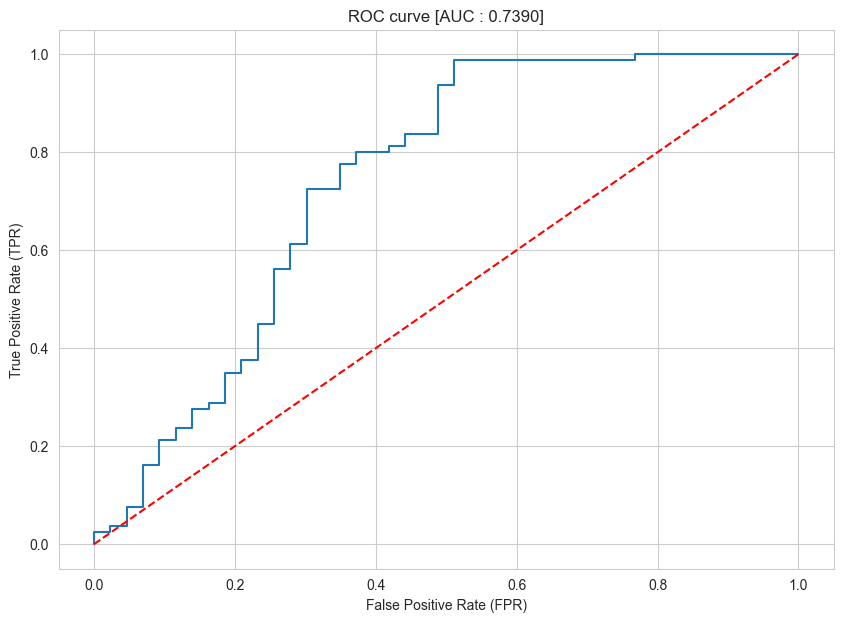

In [39]:
train = trainingModel(df_trans, target_name)
train.trainModel(model)
train.reportModel()

## Tuning model

In [40]:
class tuningModel(splitingData):
  def tuneModel(self, model):
    self.model = model
    self.model.fit(self.x_train, self.y_train)
    self.__collectValue()
    self.__findBestThreshold()

  def __collectValue(self):
    threshold_value = []
    accuracy_value = []
    target_value = 1
    max_loop = 1000
    self.y_pred_prob = self.model.predict_proba(self.x_test)[:, target_value]
    for i in range(max_loop):
      threshold = (i+1)/max_loop
      y_pred = self.y_pred_prob > threshold
      accuracy = accuracy_score(self.y_test, y_pred)
      threshold_value.append(threshold)
      accuracy_value.append(accuracy)
    self.result = list(zip(threshold_value, accuracy_value))
  
  def __findBestThreshold(self):
    result_df = pd.DataFrame(self.result, columns=['Threshold', 'Accuracy'])
    self.threshold = result_df.iloc[result_df['Accuracy'].idxmax()]['Threshold']

  def reportModel(self):
    y_pred = self.y_pred_prob > self.threshold
    report = classification_report(self.y_test, y_pred)
    accuracy = accuracy_score(self.y_test, y_pred)
    confusion = confusion_matrix(self.y_test, y_pred)
    print(f'Use algorithm : {self.model}')
    print('-'*55)
    print(f'Threshold : {self.threshold}')
    print('-'*55)
    print(f'Classification Report :\n{report}')
    print('-'*55)
    print(f'Accuracy : {accuracy*100:.4f}%')
    print('-'*55)
    print(f'Confusion Matrix :\n{confusion}')

In [41]:
x = df_trans.drop('Loan_Status', axis = 1)
y = df_trans['Loan_Status']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [43]:
param_dist = {
    'C' : [0.001,0.01, 0.1, 1, 10,100],
    'penalty' : ['l1', 'l2'],
    'max_iter' : list(range(100, 800, 100)),
    'solver' : ['liblinear']
}

In [44]:
# Search best parameter for "LogisticRegression"
LR_search = GridSearchCV(estimator = model, param_grid = param_dist, verbose = 0, n_jobs = -1)
LR_search.fit(x_train, y_train)
LR_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [45]:
model = LR_search.best_estimator_

In [46]:
tune = tuningModel(df_trans, target_name)
tune.tuneModel(model)
tune.reportModel()

Use algorithm : LogisticRegression(C=1, penalty='l1', solver='liblinear')
-------------------------------------------------------
Threshold : 0.564
-------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

-------------------------------------------------------
Accuracy : 81.3008%
-------------------------------------------------------
Confusion Matrix :
[[21 22]
 [ 1 79]]


# **Feature Engineering**

In [47]:
new_df = df_clean.copy()

In [48]:
old_nc = new_df.shape[1]

In [49]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Creating new features

In [50]:
new_df['LoanAmount'] = new_df['LoanAmount']*1_000

In [51]:
# Lets assume that interest rate = 10% per year
month_in_year = 12
interest_rate = 0.1
r = interest_rate/month_in_year
new_df['EMI'] = (new_df['LoanAmount']*r*(1+r)**new_df['Loan_Amount_Term'])/(((1+r)**new_df['Loan_Amount_Term'])-1)
new_df['totalIncome'] = new_df['ApplicantIncome'] + new_df['CoapplicantIncome']

In [52]:
new_df['EMI_per_LoanAmount'] = new_df['EMI']/new_df['LoanAmount']
new_df['EMI_per_totalIncome'] = new_df['EMI']/new_df['totalIncome']
new_df['EMI_per_totalIncome_less_than_30%'] = np.where(new_df['EMI_per_totalIncome'] < 0.30, new_df['EMI_per_totalIncome'], 0)
new_df['EMI_per_totalIncome_more_than_30%'] = np.where(new_df['EMI_per_totalIncome'] > 0.30, new_df['EMI_per_totalIncome'], 0)

In [53]:
new_df = pd.get_dummies(new_df, 
                        columns = ['Property_Area'], 
                        prefix = ['Area'], 
                        drop_first = True
                        )

In [54]:
income_bucket = ['Low', 'Average', 'High', 'Very high']
new_df['totalIncome'] = pd.cut(new_df.totalIncome,
                               bins = [0, 2_000, 4_000, 6_000, np.inf], 
                               labels = income_bucket, 
                               right = True)

In [55]:
cols_drop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'EMI', 'EMI_per_totalIncome']
new_df.drop(cols_drop, axis = 1, inplace = True)

In [56]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status,totalIncome,EMI_per_LoanAmount,EMI_per_totalIncome_less_than_30%,EMI_per_totalIncome_more_than_30%,Area_Semiurban,Area_Urban
0,Male,No,0,Graduate,No,1.0,Y,High,0.008776,0.192049,0.0,0,1
1,Male,Yes,1,Graduate,No,1.0,N,Very high,0.008776,0.184418,0.0,0,0
2,Male,Yes,0,Graduate,Yes,1.0,Y,Average,0.008776,0.193066,0.0,0,1
3,Male,Yes,0,Not Graduate,No,1.0,Y,High,0.008776,0.213132,0.0,0,1
4,Male,No,0,Graduate,No,1.0,Y,High,0.008776,0.206229,0.0,0,1


In [57]:
print(f'Columns of data before create new features : {old_nc} columns')
print(f'Columns of data after create new featutes : {new_df.shape[1]} columns')

Columns of data before create new features : 12 columns
Columns of data after create new featutes : 13 columns


## Exploratory data analysis

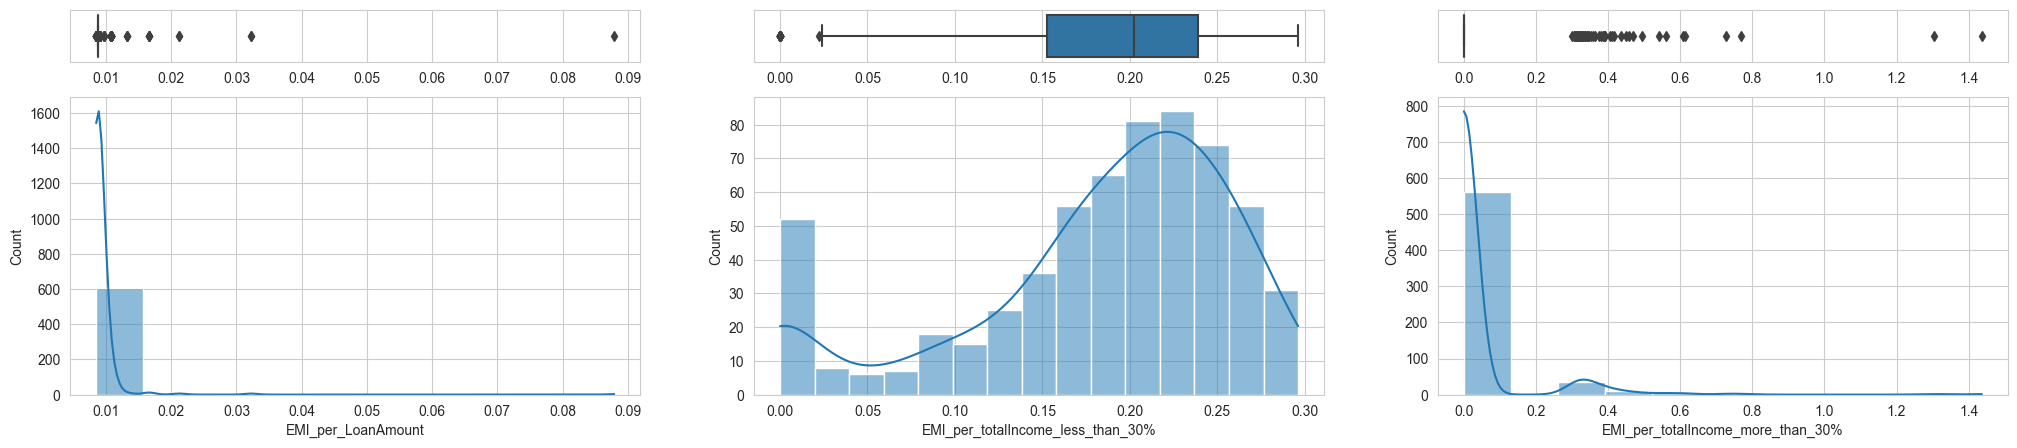

In [58]:
# Numerical Data
columns = ['EMI_per_LoanAmount', 'EMI_per_totalIncome_less_than_30%', 'EMI_per_totalIncome_more_than_30%']
plotHistograms(new_df, columns)

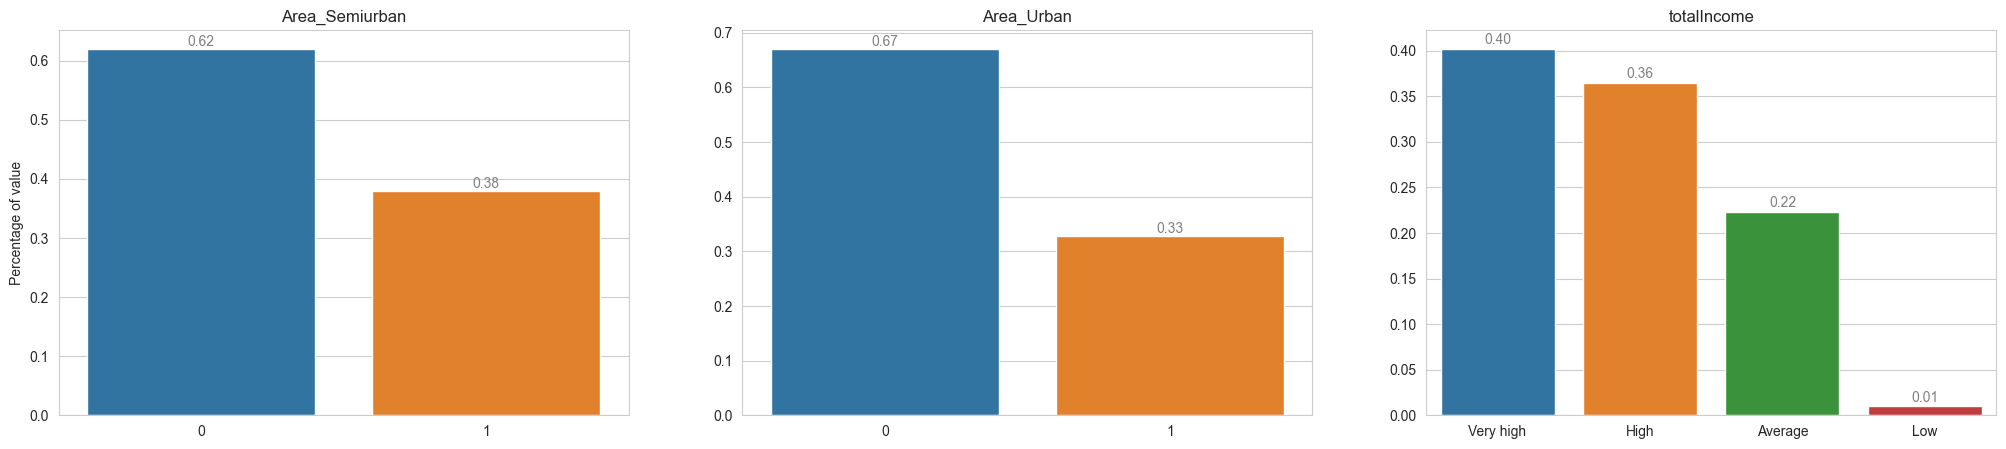

In [59]:
# Categorical Data
columns = ['Area_Semiurban', 'Area_Urban', 'totalIncome']
plotQtyValues(new_df, columns)

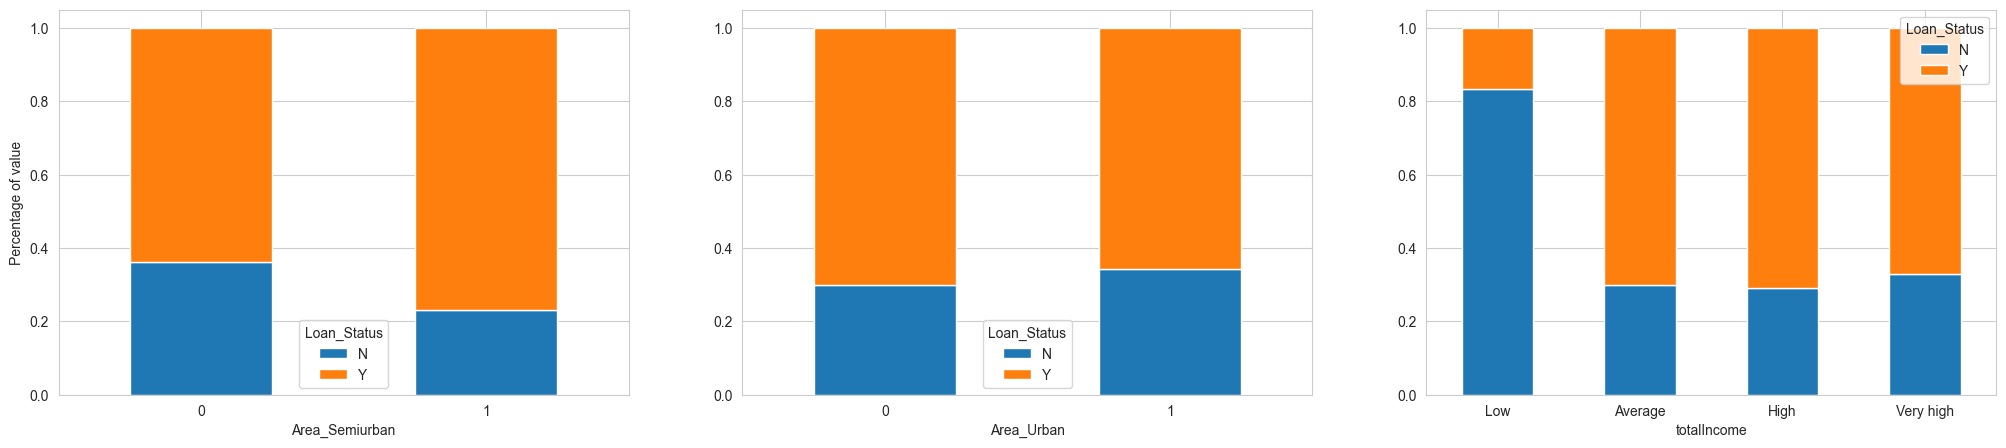

In [60]:
# Bivariate Analysis
feature = ['Area_Semiurban', 'Area_Urban', 'totalIncome']
target = 'Loan_Status'
plotQtyTarget(new_df, feature, target)

## Data Transformation

In [61]:
trans = transformationData(new_df)
trans.transformData()

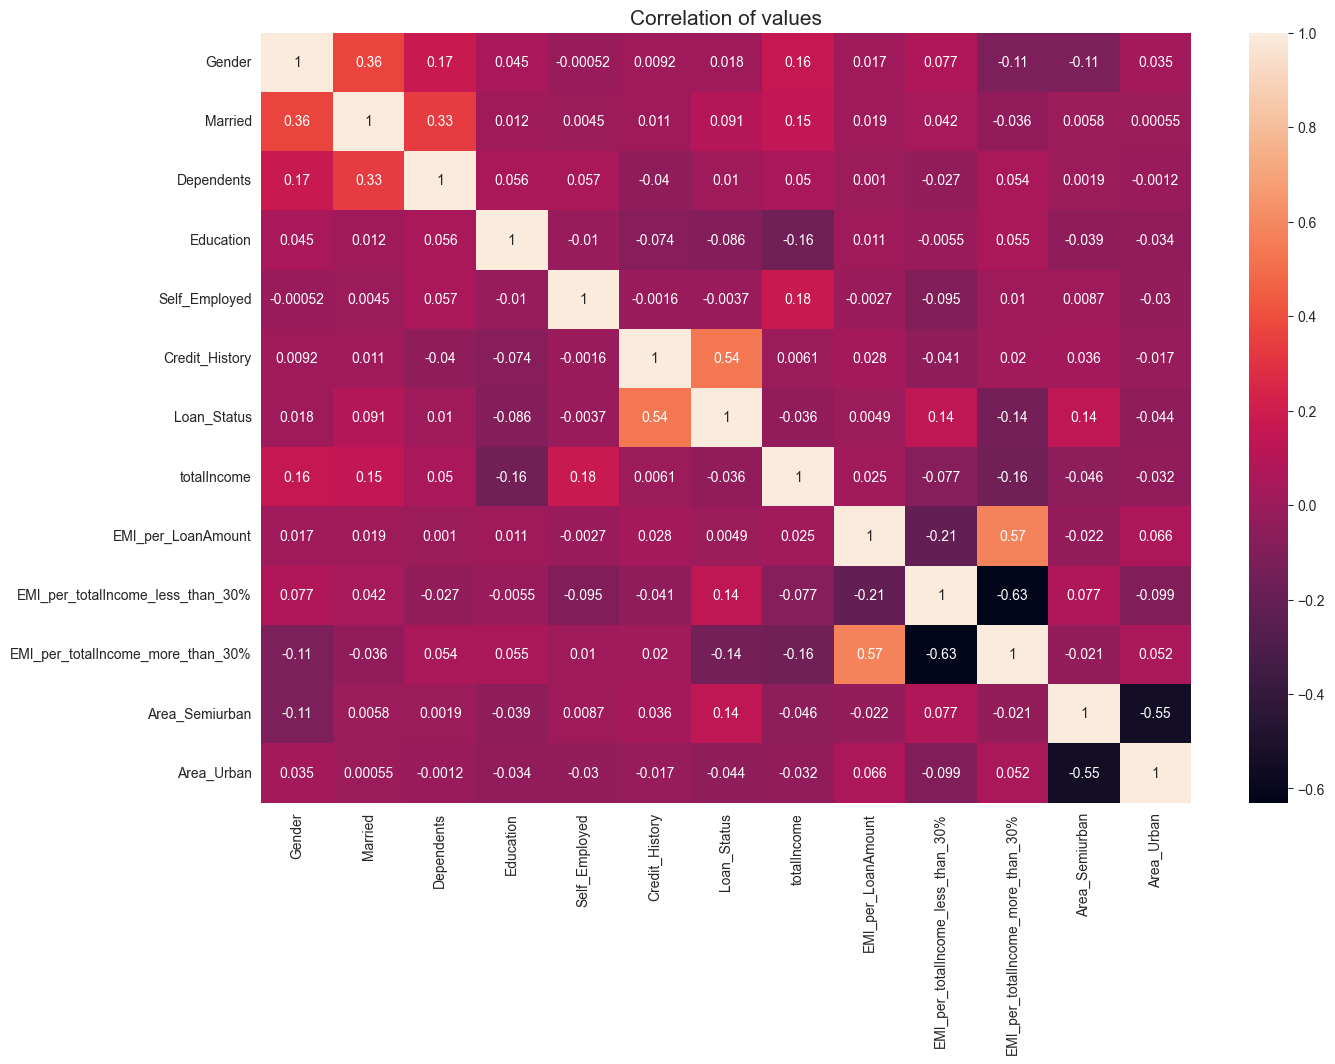

In [62]:
# Check correlation of values
corr = new_df.corr()
plt.figure(figsize = (15, 10))
ax = sns.heatmap(corr, annot = True)
ax.set_title('Correlation of values', fontsize = 15);

## Compare model

In [63]:
compare = comparingModel(new_df, target_name)
score_test = compare.compareModel(algorithms)

In [64]:
score_test

,Score(%)
LogisticRegression,81.869388
NaiveBayes,81.061224
SupportVectorMachine,81.469388
DecisionTree,68.448980
RandomForest,79.648980


In [65]:
# Choose model has the most efficiency
idx_max = score_test['Score(%)'].idxmax()
model = algorithms[idx_max]
model

LogisticRegression()

## Train model

Use algorithm : LogisticRegression()
-------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.56      0.70        43
           1       0.80      0.97      0.88        80

    accuracy                           0.83       123
   macro avg       0.86      0.77      0.79       123
weighted avg       0.85      0.83      0.82       123

-------------------------------------------------------
Accuracy : 82.9268%
-------------------------------------------------------
Confusion Matrix :
[[24 19]
 [ 2 78]]
-------------------------------------------------------


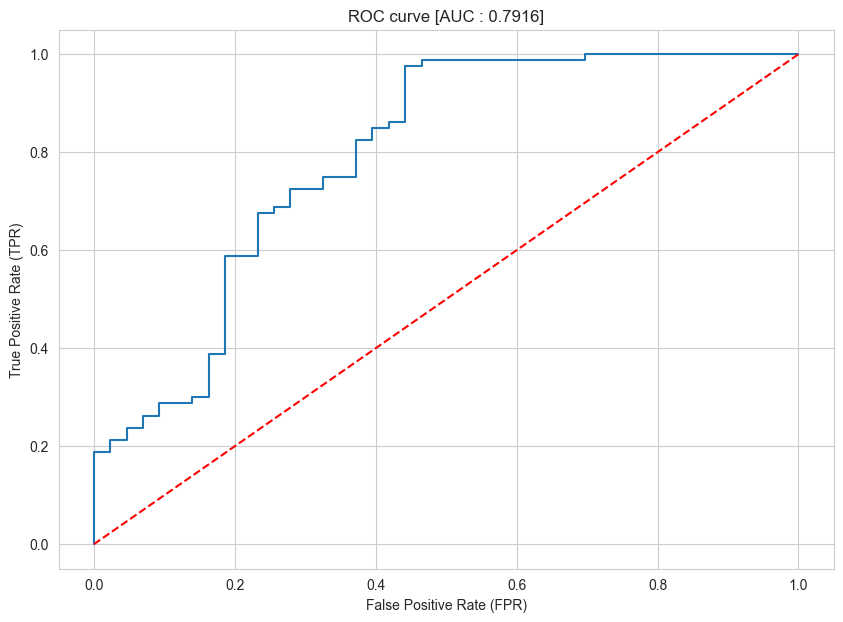

In [66]:
train = trainingModel(new_df, target_name)
train.trainModel(model)
train.reportModel()

## Tune model

In [67]:
x = new_df.drop('Loan_Status', axis = 1)
y = new_df['Loan_Status']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [69]:
param_dist = {
    'C' : [0.001,0.01, 0.1, 1, 10,100],
    'penalty' : ['l1', 'l2'],
    'max_iter' : list(range(100, 800, 100)),
    'solver' : ['liblinear']
}

In [70]:
# Search best parameter for "LogisticRegression"
LR_search = GridSearchCV(estimator = model, param_grid = param_dist, verbose = 0, n_jobs = -1)
LR_search.fit(x_train, y_train)
LR_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [71]:
model = LR_search.best_estimator_
tune = tuningModel(new_df, target_name)
tune.tuneModel(model)
tune.reportModel()

Use algorithm : LogisticRegression(C=1, penalty='l1', solver='liblinear')
-------------------------------------------------------
Threshold : 0.438
-------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.56      0.71        43
           1       0.81      0.99      0.89        80

    accuracy                           0.84       123
   macro avg       0.88      0.77      0.80       123
weighted avg       0.86      0.84      0.82       123

-------------------------------------------------------
Accuracy : 83.7398%
-------------------------------------------------------
Confusion Matrix :
[[24 19]
 [ 1 79]]
